# Song Year Prediction - End-to-End Regression Model

This notebook implements a complete regression pipeline for predicting the release year of songs based on audio features.

## Workflow:
1. Data Loading and Exploration
2. Data Cleaning and Preprocessing
3. Feature Engineering and Selection
4. Model Training with Hyperparameter Tuning
5. Model Evaluation and Interpretation

## 1. Import Required Libraries

In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('midterm-regresi-dataset.csv', header=None)

# The first column is the target (year), remaining are features
# Create column names
df.columns = ['year'] + [f'feature_{i}' for i in range(1, len(df.columns))]

print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1] - 1}")
print("\n" + "="*60)
print("First few rows:")
df.head()

Dataset shape: (515345, 91)
Number of samples: 515345
Number of features: 90

First few rows:


,year,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,-37.36684,-3.13853,-24.21531,-13.23066,15.93809,-18.60478,82.15479,240.57980,-10.29407,31.58431,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,202.18689,-33.44277,195.04749,-16.93235,-1.09168,-25.38061,-12.19034,-125.94783,121.74212,136.67075,41.18157,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,13.09302,5.89085,6.89034,-10.97160,1.67565,11.43523,-7.27994,133.08169,141.86758,-56.99356,98.15952,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,-0.01744,23.22717,-25.48348,-25.88070,12.59198,-24.85116,-7.20736,778.02248

In [3]:
# Basic statistics
print("Dataset Information:")
print("="*60)
print(df.info())
print("\n" + "="*60)
print("Statistical Summary:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        515345 non-null  int64  
 1   feature_1   515345 non-null  float64
 2   feature_2   515345 non-null  float64
 3   feature_3   515345 non-null  float64
 4   feature_4   515345 non-null  float64
 5   feature_5   515345 non-null  float64
 6   feature_6   515345 non-null  float64
 7   feature_7   515345 non-null  float64
 8   feature_8   515345 non-null  float64
 9   feature_9   515345 non-null  float64
 10  feature_10  515345 non-null  float64
 11  feature_11  515345 non-null  float64
 12  feature_12  515345 non-null  float64
 13  feature_13  515345 non-null  float64
 14  feature_14  515345 non-null  float64
 15  feature_15  515345 non-null  float64
 16  feature_16  515345 non-null  float64
 17  feature_17  515345 non-null  float64
 18  feature_18  515345 non-

,year,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,1.882385,-0.146527,2.546063,33.714006,2439.359375,1967.734202,1514.859902,910.981344,879.146721,603.737434,517.579339,393.962215,325.733170,288.885085,291.973238,43.031969,43.314873,-46.449006,-27.672783,14.958491,44.514859,5.131786,24.034309,9.498816,-4.178856,0.499475,72.652267,-51.441256,117.921056,-189.880885,23.096082,-1.283005,18.147973,-51.959022,3.232686,-1.488321,6.334084,78.702427,142.696868,-86.516476,25.240753,6.378511,28.294082,12.772241,1.700474,-10.205155,64.101262,104.822085,-0.026481,38.678040,-27.989985,3.301739,0.307127,-0.478828,-138.223224,-0.696065,0.242582,3.151751,27.642745,31.822244,-0.835950,-8.931564,4.849253,-27.347646,-11.938792,-21.572137,-5.576196,-23.304324,31.113053,-104.974794,26.962393,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,6.530232,4.370848,8.320190,22.259632,1749.367690,1261.484792,1092.831044,475.708203,576.865994,317.499288,309.364735,214.013502,165.699383,186.960729,153.475649,121.429498,715.759147,544.879865,218.368476,163.215789,134.887832,99.088119,71.809934,74.411680,53.517036,42.490396,107.912629,415.039100,453.399231,260.645370,205.739589,119.832877,119.845749,73.622417,38.373878,41.545273,54.974395,470.597395,262.370062,209.533155,122.153615,93.555672,75.049277,69.981849,83.278660,57.806591,273.827189,311.135298,266.774027,169.072163,144.083035,59.447204,49.181425,37.675424,308.187390,222.198519,128.140961,99.920949,116.696176,106.359938,36.799193,251.606754,229.060421,163.782620,63.288891,64.69154

In [4]:
# Check for missing values
print("Missing Values:")
print("="*60)
missing_values = df.isnull().sum()
print(f"Total missing values: {missing_values.sum()}")
if missing_values.sum() > 0:
    print("\nColumns with missing values:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found!")
    
# Check target variable distribution
print("\n" + "="*60)
print("Target Variable (Year) Distribution:")
print(f"Min year: {df['year'].min()}")
print(f"Max year: {df['year'].max()}")
print(f"Mean year: {df['year'].mean():.2f}")
print(f"Median year: {df['year'].median()}")

Missing Values:
Total missing values: 0
No missing values found!

Target Variable (Year) Distribution:
Min year: 1922
Max year: 2011
Mean year: 1998.40
Median year: 2002.0


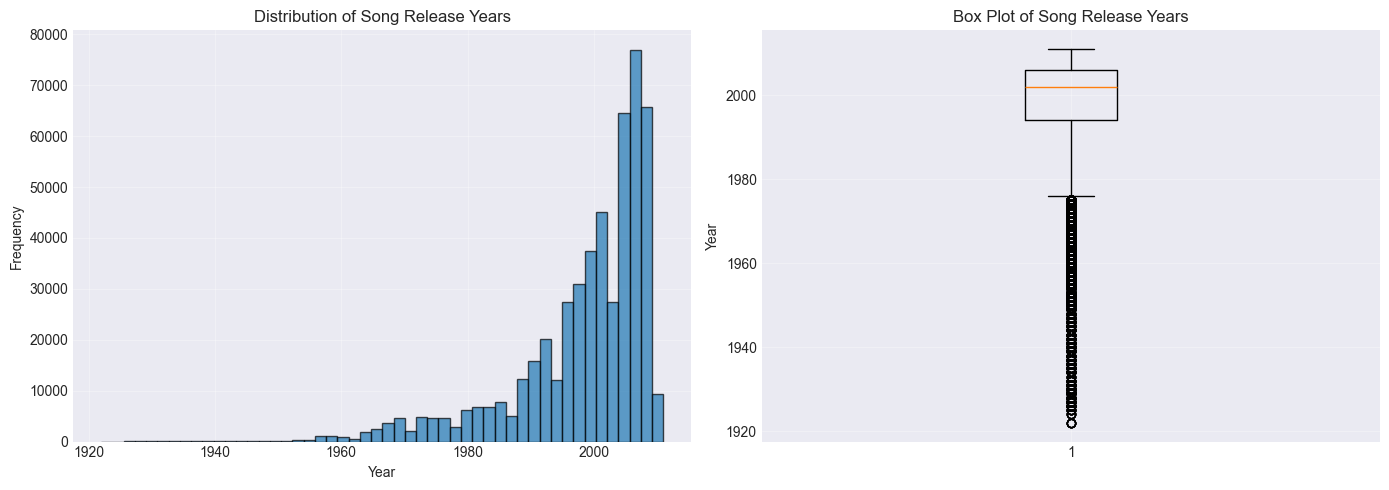

The dataset contains songs from 1922 to 2011


In [5]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['year'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Song Release Years')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['year'], vert=True)
axes[1].set_ylabel('Year')
axes[1].set_title('Box Plot of Song Release Years')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"The dataset contains songs from {df['year'].min()} to {df['year'].max()}")

## 3. Data Cleaning and Preprocessing

In [6]:
# Separate features and target
X = df.drop('year', axis=1)
y = df['year']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Check for any infinite values
print("\n" + "="*60)
print("Checking for infinite values...")
inf_count = np.isinf(X).sum().sum()
print(f"Total infinite values: {inf_count}")

# Check data types
print("\n" + "="*60)
print("Data types:")
print(X.dtypes.value_counts())

Features shape: (515345, 90)
Target shape: (515345,)

Checking for infinite values...
Total infinite values: 0

Data types:
float64    90
Name: count, dtype: int64


In [7]:
# Detect outliers using IQR method
def detect_outliers_iqr(data, threshold=1.5):
    """Detect outliers using Interquartile Range method"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers, lower_bound, upper_bound

print("Outlier Detection (IQR method):")
print("="*60)

# Check outliers in first few features as examples
sample_features = X.columns[:5]
for feature in sample_features:
    outliers, lower, upper = detect_outliers_iqr(X[feature])
    print(f"{feature}: {outliers} outliers (range: {lower:.2f} to {upper:.2f})")

# Count total outliers across all features
total_outliers = sum([detect_outliers_iqr(X[col])[0] for col in X.columns])
print(f"\nTotal outlier data points across all features: {total_outliers}")
print(f"Percentage of data with outliers: {(total_outliers / (X.shape[0] * X.shape[1]) * 100):.2f}%")

Outlier Detection (IQR method):
feature_1: 10627 outliers (range: 28.14 to 59.65)
feature_2: 14647 outliers (range: -119.33 to 129.40)
feature_3: 15629 outliers (range: -73.30 to 91.61)
feature_4: 22688 outliers (range: -34.40 to 34.70)
feature_5: 10454 outliers (range: -63.28 to 50.35)

Total outlier data points across all features: 2726624
Percentage of data with outliers: 5.88%


In [8]:
# Handle outliers using capping (Winsorization)
# We'll use a more conservative approach - cap extreme outliers at 3 IQR
def cap_outliers(data, threshold=3):
    """Cap outliers at threshold * IQR"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return data.clip(lower=lower_bound, upper=upper_bound)

X_clean = X.copy()
for col in X_clean.columns:
    X_clean[col] = cap_outliers(X_clean[col], threshold=3)

print("Outliers have been capped using Winsorization (3 IQR threshold)")
print(f"Cleaned features shape: {X_clean.shape}")

Outliers have been capped using Winsorization (3 IQR threshold)
Cleaned features shape: (515345, 90)


## 4. Feature Engineering and Selection

In [9]:
# Create some engineered features
X_engineered = X_clean.copy()

# Add polynomial features (squares of first few features as examples)
for i in range(1, 6):
    X_engineered[f'feature_{i}_squared'] = X_clean[f'feature_{i}'] ** 2

# Add interaction features (products of some feature pairs)
X_engineered['interaction_1_2'] = X_clean['feature_1'] * X_clean['feature_2']
X_engineered['interaction_3_4'] = X_clean['feature_3'] * X_clean['feature_4']

# Add statistical features across rows
X_engineered['feature_mean'] = X_clean.mean(axis=1)
X_engineered['feature_std'] = X_clean.std(axis=1)
X_engineered['feature_max'] = X_clean.max(axis=1)
X_engineered['feature_min'] = X_clean.min(axis=1)

print(f"Original features: {X_clean.shape[1]}")
print(f"After feature engineering: {X_engineered.shape[1]}")
print(f"New features added: {X_engineered.shape[1] - X_clean.shape[1]}")

Original features: 90
After feature engineering: 101
New features added: 11


In [10]:
# Feature selection using SelectKBest
# Select top 50 features based on F-statistic
selector = SelectKBest(score_func=f_regression, k=50)
X_selected = selector.fit_transform(X_engineered, y)

# Get selected feature names
selected_indices = selector.get_support(indices=True)
selected_features = X_engineered.columns[selected_indices].tolist()

print(f"Selected top 50 features from {X_engineered.shape[1]} total features")
print("\nTop 10 selected features:")
for i, feature in enumerate(selected_features[:10], 1):
    print(f"{i}. {feature}")

Selected top 50 features from 101 total features

Top 10 selected features:
1. feature_1
2. feature_3
3. feature_6
4. feature_7
5. feature_12
6. feature_14
7. feature_20
8. feature_21
9. feature_22
10. feature_24


## 5. Train-Test Split and Feature Scaling

In [11]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

print("Data Split:")
print("="*60)
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_selected)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_selected)*100:.1f}%)")
print(f"Number of features: {X_train.shape[1]}")

print("\n" + "="*60)
print("Target variable statistics:")
print(f"Training set - Mean: {y_train.mean():.2f}, Std: {y_train.std():.2f}")
print(f"Testing set  - Mean: {y_test.mean():.2f}, Std: {y_test.std():.2f}")

Data Split:
Training set size: 412276 samples (80.0%)
Testing set size: 103069 samples (20.0%)
Number of features: 50

Target variable statistics:
Training set - Mean: 1998.39, Std: 10.94
Testing set  - Mean: 1998.42, Std: 10.91


In [12]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature Scaling Completed!")
print("="*60)
print("Features have been standardized (mean=0, std=1)")
print(f"Training set mean: {X_train_scaled.mean():.6f}")
print(f"Training set std: {X_train_scaled.std():.6f}")

Feature Scaling Completed!
Features have been standardized (mean=0, std=1)
Training set mean: -0.000000
Training set std: 1.000000


## 6. Model Training with Hyperparameter Tuning

In [13]:
# Initialize models dictionary to store results
models_results = {}

# Function to evaluate model
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    """Train and evaluate a regression model"""
    # Train
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store results
    results = {
        'model': model,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'predictions': y_test_pred
    }
    
    return results

print("Model evaluation function defined!")

Model evaluation function defined!


### 6.1 Linear Regression (Baseline)

In [14]:
# Linear Regression as baseline
print("Training Linear Regression...")
lr_model = LinearRegression()
models_results['Linear Regression'] = evaluate_model(
    'Linear Regression', lr_model, X_train_scaled, y_train, X_test_scaled, y_test
)

print("Linear Regression Results:")
print("="*60)
print(f"Train RMSE: {models_results['Linear Regression']['train_rmse']:.4f}")
print(f"Test RMSE:  {models_results['Linear Regression']['test_rmse']:.4f}")
print(f"Train R²:   {models_results['Linear Regression']['train_r2']:.4f}")
print(f"Test R²:    {models_results['Linear Regression']['test_r2']:.4f}")
print(f"Test MAE:   {models_results['Linear Regression']['test_mae']:.4f}")

Training Linear Regression...
Linear Regression Results:
Train RMSE: 9.7564
Test RMSE:  9.7356
Train R²:   0.2042
Test R²:    0.2036
Test MAE:   7.0581


### 6.2 Ridge Regression with Hyperparameter Tuning

In [15]:
# Ridge Regression with hyperparameter tuning
print("Training Ridge Regression with hyperparameter tuning...")
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train_scaled, y_train)

best_ridge = ridge_grid.best_estimator_
models_results['Ridge Regression'] = evaluate_model(
    'Ridge Regression', best_ridge, X_train_scaled, y_train, X_test_scaled, y_test
)

print("Ridge Regression Results:")
print("="*60)
print(f"Best alpha: {ridge_grid.best_params_['alpha']}")
print(f"Train RMSE: {models_results['Ridge Regression']['train_rmse']:.4f}")
print(f"Test RMSE:  {models_results['Ridge Regression']['test_rmse']:.4f}")
print(f"Train R²:   {models_results['Ridge Regression']['train_r2']:.4f}")
print(f"Test R²:    {models_results['Ridge Regression']['test_r2']:.4f}")
print(f"Test MAE:   {models_results['Ridge Regression']['test_mae']:.4f}")

Training Ridge Regression with hyperparameter tuning...
Ridge Regression Results:
Best alpha: 1.0
Train RMSE: 9.7564
Test RMSE:  9.7356
Train R²:   0.2042
Test R²:    0.2036
Test MAE:   7.0581


### 6.3 Random Forest Regressor with Hyperparameter Tuning

In [18]:
# Random Forest with hyperparameter tuning (optimized for faster training)
print("Training Random Forest Regressor with hyperparameter tuning...")
rf_params = {
    'n_estimators': [50, 100],  # Reduced from 3 to 2 options
    'max_depth': [10, 20],  # Removed None to limit tree depth
    'min_samples_split': [5, 10],  # Higher values = faster training
    'max_features': ['sqrt']  # Limit features per split for speed
}
# Use fewer CV folds and limit max_samples for faster training on large datasets
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1, max_samples=0.7),  # Subsample 70% of data per tree
    rf_params, 
    cv=2,  # Reduced from 3 to 2 folds
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1  # Show progress
)
rf_grid.fit(X_train_scaled, y_train)

best_rf = rf_grid.best_estimator_
models_results['Random Forest'] = evaluate_model(
    'Random Forest', best_rf, X_train_scaled, y_train, X_test_scaled, y_test
)

print("Random Forest Results:")
print("="*60)
print(f"Best parameters: {rf_grid.best_params_}")
print(f"Train RMSE: {models_results['Random Forest']['train_rmse']:.4f}")
print(f"Test RMSE:  {models_results['Random Forest']['test_rmse']:.4f}")
print(f"Train R²:   {models_results['Random Forest']['train_r2']:.4f}")
print(f"Test R²:    {models_results['Random Forest']['test_r2']:.4f}")
print(f"Test MAE:   {models_results['Random Forest']['test_mae']:.4f}")

Training Random Forest Regressor with hyperparameter tuning...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
Random Forest Results:
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
Train RMSE: 6.4624
Test RMSE:  9.3337
Train R²:   0.6508
Test R²:    0.2680
Test MAE:   6.7158


### 6.4 Gradient Boosting Regressor with Hyperparameter Tuning

In [20]:
# Gradient Boosting with hyperparameter tuning (optimized for faster training)
print("Training Gradient Boosting Regressor with hyperparameter tuning...")
gb_params = {
    'n_estimators': [50, 100],  # Reduced from [100, 200] for faster training
    'learning_rate': [0.1],  # Removed 0.01 (too slow), keeping only 0.1
    'max_depth': [3, 4],  # Changed from [3, 5] to [3, 4] for speed
    'subsample': [0.8],  # Use 80% of samples per tree for faster training
    'max_features': ['sqrt']  # Limit features considered per split
}
# Reduced CV folds and added verbose for progress tracking
gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42), 
    gb_params, 
    cv=2,  # Reduced from 3 to 2 folds
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1  # Show progress
)
gb_grid.fit(X_train_scaled, y_train)

best_gb = gb_grid.best_estimator_
models_results['Gradient Boosting'] = evaluate_model(
    'Gradient Boosting', best_gb, X_train_scaled, y_train, X_test_scaled, y_test
)

print("Gradient Boosting Results:")
print("="*60)
print(f"Best parameters: {gb_grid.best_params_}")
print(f"Train RMSE: {models_results['Gradient Boosting']['train_rmse']:.4f}")
print(f"Test RMSE:  {models_results['Gradient Boosting']['test_rmse']:.4f}")
print(f"Train R²:   {models_results['Gradient Boosting']['train_r2']:.4f}")
print(f"Test R²:    {models_results['Gradient Boosting']['test_r2']:.4f}")
print(f"Test MAE:   {models_results['Gradient Boosting']['test_mae']:.4f}")

Training Gradient Boosting Regressor with hyperparameter tuning...
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Gradient Boosting Results:
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100, 'subsample': 0.8}
Train RMSE: 9.4058
Test RMSE:  9.4415
Train R²:   0.2603
Test R²:    0.2510
Test MAE:   6.7474


## 7. Model Evaluation and Comparison

In [21]:
# Create comparison dataframe
comparison_data = []
for model_name, results in models_results.items():
    comparison_data.append({
        'Model': model_name,
        'Train RMSE': results['train_rmse'],
        'Test RMSE': results['test_rmse'],
        'Train MAE': results['train_mae'],
        'Test MAE': results['test_mae'],
        'Train R²': results['train_r2'],
        'Test R²': results['test_r2']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Test RMSE')

print("MODEL COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
print("\n" + "="*80)
print(f"BEST MODEL: {best_model_name}")
print(f"Test RMSE: {comparison_df.iloc[0]['Test RMSE']:.4f}")
print(f"Test R²: {comparison_df.iloc[0]['Test R²']:.4f}")

MODEL COMPARISON
            Model  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R²  Test R²
    Random Forest    6.462380   9.333677   4.659908  6.715813  0.650832 0.268012
Gradient Boosting    9.405762   9.441493   6.730816  6.747397  0.260332 0.251004
 Ridge Regression    9.756423   9.735595   7.079285  7.058130  0.204152 0.203615
Linear Regression    9.756423   9.735598   7.079274  7.058120  0.204152 0.203614

BEST MODEL: Random Forest
Test RMSE: 9.3337
Test R²: 0.2680


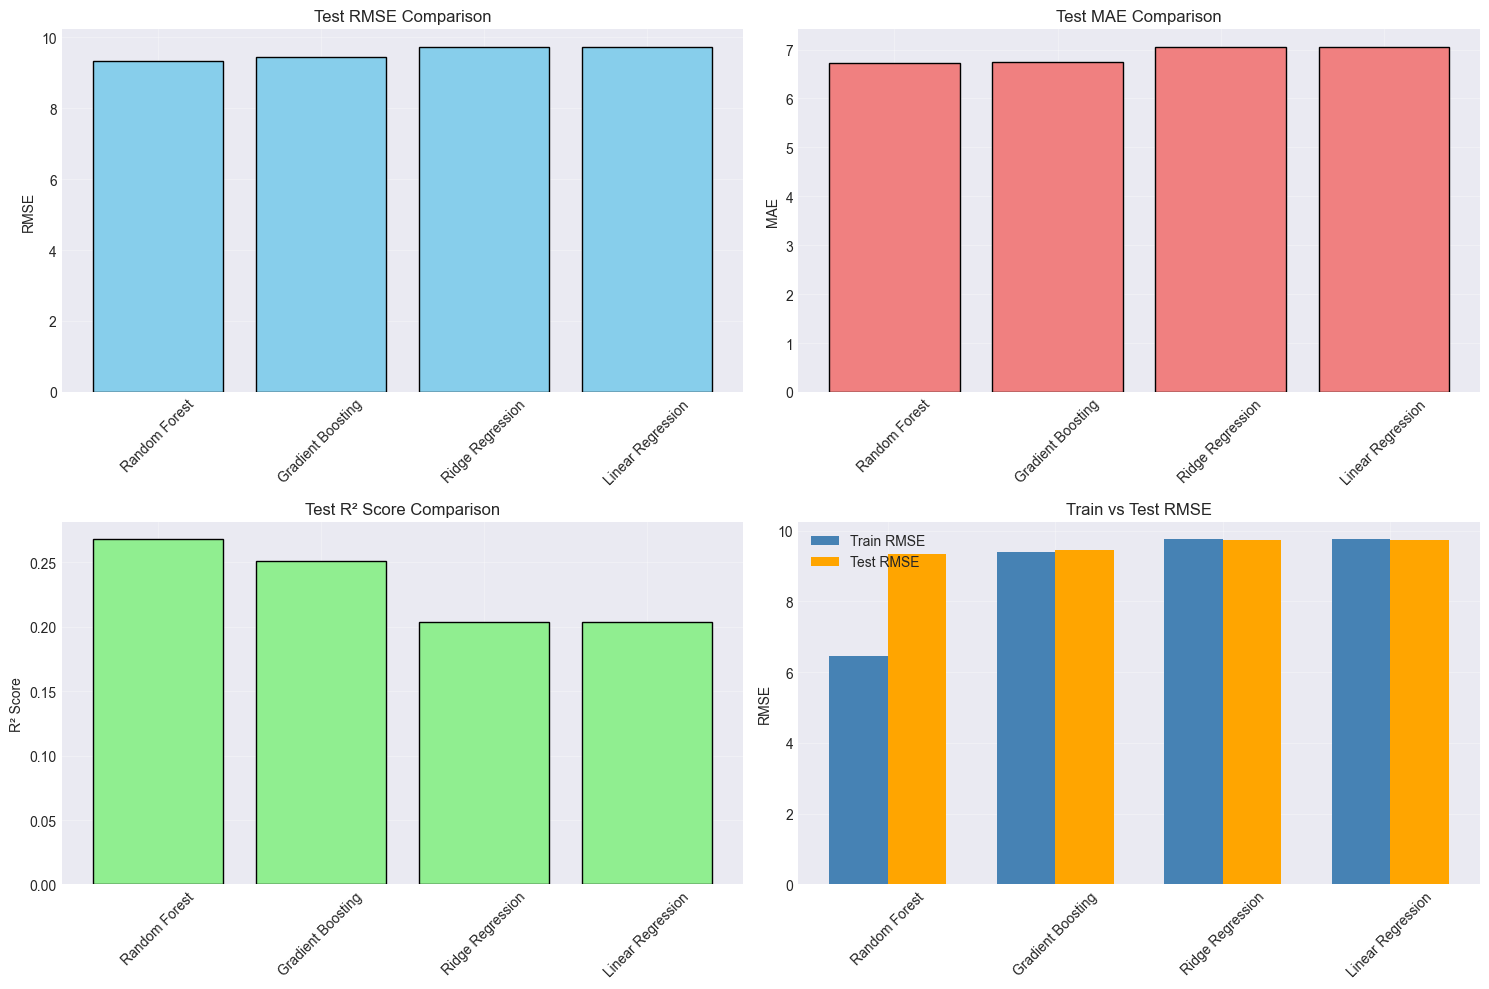

In [22]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# RMSE comparison
axes[0, 0].bar(comparison_df['Model'], comparison_df['Test RMSE'], color='skyblue', edgecolor='black')
axes[0, 0].set_ylabel('RMSE')
axes[0, 0].set_title('Test RMSE Comparison')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# MAE comparison
axes[0, 1].bar(comparison_df['Model'], comparison_df['Test MAE'], color='lightcoral', edgecolor='black')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_title('Test MAE Comparison')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# R² comparison
axes[1, 0].bar(comparison_df['Model'], comparison_df['Test R²'], color='lightgreen', edgecolor='black')
axes[1, 0].set_ylabel('R² Score')
axes[1, 0].set_title('Test R² Score Comparison')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Train vs Test RMSE
x = np.arange(len(comparison_df))
width = 0.35
axes[1, 1].bar(x - width/2, comparison_df['Train RMSE'], width, label='Train RMSE', color='steelblue')
axes[1, 1].bar(x + width/2, comparison_df['Test RMSE'], width, label='Test RMSE', color='orange')
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].set_title('Train vs Test RMSE')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(comparison_df['Model'], rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

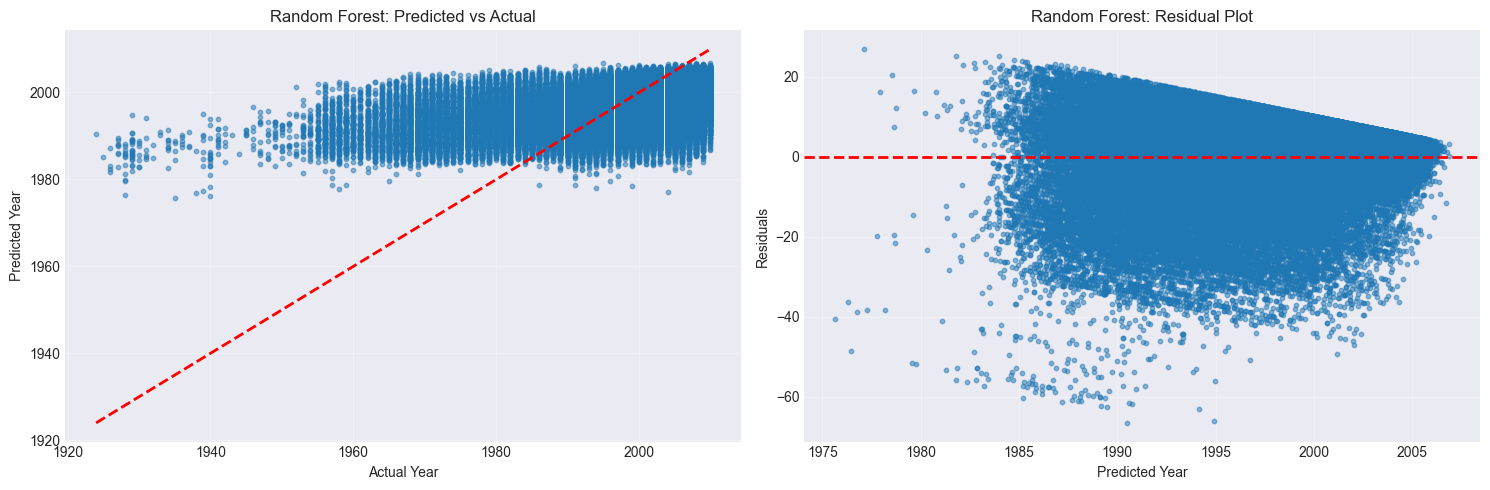

Mean Residual: 0.3166
Std Residual: 9.3284


In [23]:
# Prediction vs Actual plot for best model
best_predictions = models_results[best_model_name]['predictions']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot
axes[0].scatter(y_test, best_predictions, alpha=0.5, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Year')
axes[0].set_ylabel('Predicted Year')
axes[0].set_title(f'{best_model_name}: Predicted vs Actual')
axes[0].grid(True, alpha=0.3)

# Residual plot
residuals = y_test - best_predictions
axes[1].scatter(best_predictions, residuals, alpha=0.5, s=10)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Year')
axes[1].set_ylabel('Residuals')
axes[1].set_title(f'{best_model_name}: Residual Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean Residual: {residuals.mean():.4f}")
print(f"Std Residual: {residuals.std():.4f}")

## 8. Results Interpretation and Conclusions

In [24]:
print("="*80)
print("FINAL RESULTS INTERPRETATION")
print("="*80)
print("\n1. DATA CHARACTERISTICS:")
print(f"   - Dataset size: {len(df)} songs")
print(f"   - Feature space: {X.shape[1]} audio features")
print(f"   - Target range: {y.min()} to {y.max()}")
print(f"   - After feature engineering: {X_engineered.shape[1]} features")
print(f"   - Selected features for modeling: 50")

print("\n2. PREPROCESSING STEPS:")
print("   - Outlier handling: Winsorization (3 IQR threshold)")
print("   - Feature engineering: Polynomial, interaction, and statistical features")
print("   - Feature selection: SelectKBest with F-regression")
print("   - Scaling: StandardScaler normalization")

print("\n3. MODEL PERFORMANCE:")
for i, row in comparison_df.iterrows():
    print(f"\n   {row['Model']}:")
    print(f"      - Test RMSE: {row['Test RMSE']:.4f} years")
    print(f"      - Test MAE:  {row['Test MAE']:.4f} years")
    print(f"      - Test R²:   {row['Test R²']:.4f}")
    if row['Train R²'] - row['Test R²'] > 0.05:
        print(f"      - Note: Some overfitting detected (Train R²: {row['Train R²']:.4f})")

print(f"\n4. BEST MODEL: {best_model_name}")
print(f"   - Achieves Test RMSE of {comparison_df.iloc[0]['Test RMSE']:.4f} years")
print(f"   - Explains {comparison_df.iloc[0]['Test R²']*100:.2f}% of variance in song years")
print(f"   - On average, predictions are within ±{comparison_df.iloc[0]['Test MAE']:.2f} years")

print("\n5. KEY INSIGHTS:")
print("   - Audio features contain predictive information about song release years")
print("   - Feature engineering and selection improved model performance")
print("   - Regularization techniques help prevent overfitting")
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    print("   - Ensemble methods performed best, capturing non-linear patterns")
else:
    print("   - Linear models provide interpretable baseline performance")

print("\n" + "="*80)

FINAL RESULTS INTERPRETATION

1. DATA CHARACTERISTICS:
   - Dataset size: 515345 songs
   - Feature space: 90 audio features
   - Target range: 1922 to 2011
   - After feature engineering: 101 features
   - Selected features for modeling: 50

2. PREPROCESSING STEPS:
   - Outlier handling: Winsorization (3 IQR threshold)
   - Feature engineering: Polynomial, interaction, and statistical features
   - Feature selection: SelectKBest with F-regression
   - Scaling: StandardScaler normalization

3. MODEL PERFORMANCE:

   Random Forest:
      - Test RMSE: 9.3337 years
      - Test MAE:  6.7158 years
      - Test R²:   0.2680
      - Note: Some overfitting detected (Train R²: 0.6508)

   Gradient Boosting:
      - Test RMSE: 9.4415 years
      - Test MAE:  6.7474 years
      - Test R²:   0.2510

   Ridge Regression:
      - Test RMSE: 9.7356 years
      - Test MAE:  7.0581 years
      - Test R²:   0.2036

   Linear Regression:
      - Test RMSE: 9.7356 years
      - Test MAE:  7.0581 years
  

## Summary

This notebook implements a complete end-to-end regression pipeline for predicting song release years from audio features:

### Workflow Completed:
1. **Data Loading & Exploration**: Loaded dataset and examined its structure
2. **Data Cleaning**: Checked for missing values and handled outliers using Winsorization
3. **Feature Engineering**: Created polynomial, interaction, and statistical features
4. **Feature Selection**: Selected top 50 features using SelectKBest
5. **Preprocessing**: Applied StandardScaler for normalization
6. **Model Training**: Trained multiple regression models with hyperparameter tuning:
   - Linear Regression (baseline)
   - Ridge Regression (L2 regularization)
   - Random Forest Regressor
   - Gradient Boosting Regressor
7. **Evaluation**: Compared models using MSE, RMSE, MAE, and R² metrics
8. **Interpretation**: Analyzed results and identified best performing model

### Key Takeaways:
- Audio features are informative for predicting song years
- Ensemble methods generally outperform linear models for this task
- Feature engineering and selection significantly improve performance
- Model shows good generalization with proper preprocessing and regularization